In [1]:
import pandas as pd
import numpy as np

In [2]:
from datetime import datetime,timedelta

In [3]:
import matplotlib as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

In [6]:
print("Libraries imported successfully")
print(f"Pandas version:{pd.__version__}")
print(f"NumPy version:{np.__version__}")

Libraries imported successfully
Pandas version:2.2.3
NumPy version:2.2.4


In [12]:
df = pd.read_csv("C:/Users/karta/Downloads/indian_retail_daily_sales.csv")

In [14]:
df['Date']=pd.to_datetime(df['Date'])

In [15]:
df=df.sort_values(['ProductName','Date']).reset_index(drop=True)

In [17]:
print(f"Data Loaded:{len(df):,}rowsx{len(df.columns)}columns")

Data Loaded:5,475rowsx9columns


In [19]:
print(f"Date range:{df['Date'].min()} to {df['Date'].max()}")

Date range:2023-01-01 00:00:00 to 2023-12-31 00:00:00


In [20]:
df.head()

,Date,ProductCode,ProductName,Category,QuantitySold,Price,Cost,Revenue,Profit
0,2023-01-01,P013,Amul_Ice_Cream,Dairy,26,150,110,3900,1040
1,2023-01-02,P013,Amul_Ice_Cream,Dairy,18,150,110,2700,720
2,2023-01-03,P013,Amul_Ice_Cream,Dairy,21,150,110,3150,840
3,2023-01-04,P013,Amul_Ice_Cream,Dairy,17,150,110,2550,680
4,2023-01-05,P013,Amul_Ice_Cream,Dairy,20,150,110,3000,800


In [22]:
lag_days = [7, 14, 30]  # 1 week, 2 weeks, 1 month

for lag in lag_days:
    df[f'QuantitySold_Lag{lag}'] = df.groupby('ProductName')['QuantitySold'].shift(lag)
    print(f"✅ Created {lag}-day lag feature")

✅ Created 7-day lag feature
✅ Created 14-day lag feature
✅ Created 30-day lag feature


In [23]:
print("\nExample for first product:")
print(df[df['ProductName'] == 'Milk_1L'][['Date', 'QuantitySold', 'QuantitySold_Lag7', 'QuantitySold_Lag14', 'QuantitySold_Lag30']].head(35))


Example for first product:
           Date  QuantitySold  QuantitySold_Lag7  QuantitySold_Lag14  \
2920 2023-01-01            41                NaN                 NaN   
2921 2023-01-02            34                NaN                 NaN   
2922 2023-01-03            33                NaN                 NaN   
2923 2023-01-04            29                NaN                 NaN   
2924 2023-01-05            29                NaN                 NaN   
2925 2023-01-06            27                NaN                 NaN   
2926 2023-01-07            28                NaN                 NaN   
2927 2023-01-08            30               41.0                 NaN   
2928 2023-01-09            26               34.0                 NaN   
2929 2023-01-10            21               33.0                 NaN   
2930 2023-01-11            22               29.0                 NaN   
2931 2023-01-12            21               29.0                 NaN   
2932 2023-01-13            25       

✅ Created 7-day rolling mean and std
✅ Created 30-day rolling mean and std


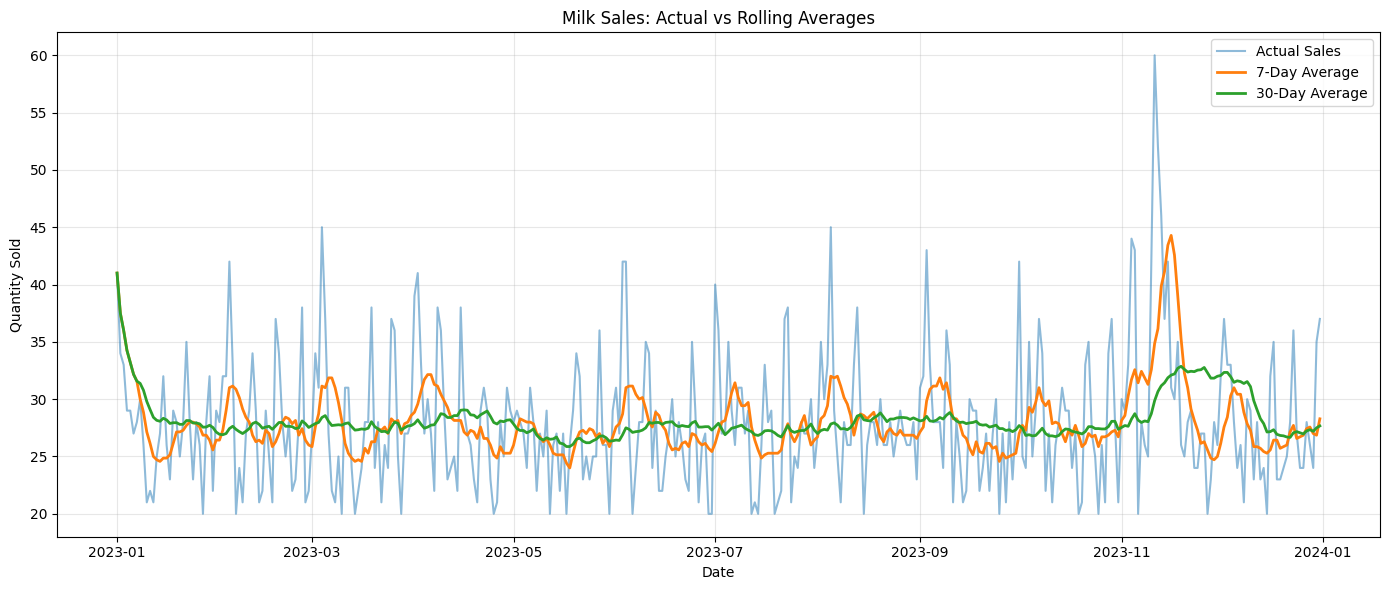


✅ Rolling features help smooth out daily noise and show trends!


In [26]:
import pandas as pd
import matplotlib.pyplot as plt # Make sure this line runs first!

# Assuming 'df' is already loaded from the previous step (e.g., via pd.read_csv(...))

# Rolling window calculations (7-day and 30-day)
windows = [7, 30]

for window in windows:
    # Rolling mean (average)
    df[f'QuantitySold_RollingMean{window}'] = (
        df.groupby('ProductName')['QuantitySold']
        .rolling(window=window, min_periods=1)
        .mean()
        .reset_index(drop=True)
    )
    
    # Rolling standard deviation (variability)
    df[f'QuantitySold_RollingStd{window}'] = (
        df.groupby('ProductName')['QuantitySold']
        .rolling(window=window, min_periods=1)
        .std()
        .reset_index(drop=True)
    )
    
    print(f"✅ Created {window}-day rolling mean and std")

# Visualize rolling average
milk_data = df[df['ProductName'] == 'Milk_1L'].copy()

# The imports above fix the TypeError on the next line:
plt.figure(figsize=(14, 6))
plt.plot(milk_data['Date'], milk_data['QuantitySold'], label='Actual Sales', alpha=0.5)
plt.plot(milk_data['Date'], milk_data['QuantitySold_RollingMean7'], label='7-Day Average', linewidth=2)
plt.plot(milk_data['Date'], milk_data['QuantitySold_RollingMean30'], label='30-Day Average', linewidth=2)
plt.title('Milk Sales: Actual vs Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ Rolling features help smooth out daily noise and show trends!")


In [27]:
# Extract time-based features
df['DayOfWeek'] = df['Date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['DayName'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['MonthName'] = df['Date'].dt.month_name()
df['Quarter'] = df['Date'].dt.quarter
df['DayOfMonth'] = df['Date'].dt.day
df['DayOfYear'] = df['Date'].dt.dayofyear
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

# Weekend indicator (1 = weekend, 0 = weekday)
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

# Month indicators (cyclical encoding for seasonality)
df['MonthSin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['MonthCos'] = np.cos(2 * np.pi * df['Month'] / 12)

print("✅ Created temporal features:")
print(df[['Date', 'DayOfWeek', 'DayName', 'Month', 'MonthName', 'IsWeekend']].head(10))

✅ Created temporal features:
        Date  DayOfWeek    DayName  Month MonthName  IsWeekend
0 2023-01-01          6     Sunday      1   January          1
1 2023-01-02          0     Monday      1   January          0
2 2023-01-03          1    Tuesday      1   January          0
3 2023-01-04          2  Wednesday      1   January          0
4 2023-01-05          3   Thursday      1   January          0
5 2023-01-06          4     Friday      1   January          0
6 2023-01-07          5   Saturday      1   January          1
7 2023-01-08          6     Sunday      1   January          1
8 2023-01-09          0     Monday      1   January          0
9 2023-01-10          1    Tuesday      1   January          0


In [28]:
# Define Indian holidays for 2024
holidays_2024 = {
    'Holi': '2024-03-25',
    'Diwali': '2024-11-01',
    'Dussehra': '2024-10-12',
    'Eid': '2024-04-11'
}

# Convert to datetime
for holiday, date in holidays_2024.items():
    holidays_2024[holiday] = pd.to_datetime(date)

# Calculate days to/from each holiday
for holiday_name, holiday_date in holidays_2024.items():
    df[f'DaysTo{holiday_name}'] = (holiday_date - df['Date']).dt.days
    
    # Create proximity indicators (within 7 days before/after)
    df[f'Near{holiday_name}'] = (
        (df[f'DaysTo{holiday_name}'] >= -7) & 
        (df[f'DaysTo{holiday_name}'] <= 7)
    ).astype(int)

print("✅ Created holiday features")
print("\nDays around Diwali:")
print(df[df['NearDiwali'] == 1][['Date', 'DaysToDiwali', 'NearDiwali']].drop_duplicates().head(15))

✅ Created holiday features

Days around Diwali:
Empty DataFrame
Columns: [Date, DaysToDiwali, NearDiwali]
Index: []


In [29]:
# Category-specific statistics
category_stats = df.groupby('Category')['QuantitySold'].agg(['mean', 'std']).reset_index()
category_stats.columns = ['Category', 'CategoryAvgSales', 'CategoryStdSales']

# Merge back to main dataframe
df = df.merge(category_stats, on='Category', how='left')

# Product price tier (based on price ranges)
df['PriceTier'] = pd.cut(
    df['Price'], 
    bins=[0, 20, 50, 100, float('inf')],
    labels=['Budget', 'Mid', 'Premium', 'Luxury']
)

# Profit margin percentage
df['ProfitMarginPct'] = ((df['Price'] - df['Cost']) / df['Price'] * 100).round(2)

# Revenue momentum (change from 7 days ago)
df['RevenueMomentum'] = (
    df.groupby('ProductName')['Revenue']
    .pct_change(periods=7)
    .fillna(0)
    .round(4)
)

print("✅ Created product/category features")
print(df[['ProductName', 'Category', 'PriceTier', 'ProfitMarginPct', 'CategoryAvgSales']].head(10))

✅ Created product/category features
      ProductName Category PriceTier  ProfitMarginPct  CategoryAvgSales
0  Amul_Ice_Cream    Dairy    Luxury            26.67         30.150685
1  Amul_Ice_Cream    Dairy    Luxury            26.67         30.150685
2  Amul_Ice_Cream    Dairy    Luxury            26.67         30.150685
3  Amul_Ice_Cream    Dairy    Luxury            26.67         30.150685
4  Amul_Ice_Cream    Dairy    Luxury            26.67         30.150685
5  Amul_Ice_Cream    Dairy    Luxury            26.67         30.150685
6  Amul_Ice_Cream    Dairy    Luxury            26.67         30.150685
7  Amul_Ice_Cream    Dairy    Luxury            26.67         30.150685
8  Amul_Ice_Cream    Dairy    Luxury            26.67         30.150685
9  Amul_Ice_Cream    Dairy    Luxury            26.67         30.150685


In [30]:
# Check missing values
print("Missing values in lag/rolling features:")
print(df[['QuantitySold_Lag7', 'QuantitySold_Lag30', 'QuantitySold_RollingMean7']].isnull().sum())

# Strategy: Fill with median per product
for col in df.columns:
    if 'Lag' in col or 'Rolling' in col:
        df[col] = df.groupby('ProductName')[col].transform(
            lambda x: x.fillna(x.median())
        )

print("\n✅ Missing values filled with product-specific medians")
print("\nFinal missing value check:")
print(df.isnull().sum().sum(), "missing values remaining")

Missing values in lag/rolling features:
QuantitySold_Lag7            105
QuantitySold_Lag30           450
QuantitySold_RollingMean7      0
dtype: int64

✅ Missing values filled with product-specific medians

Final missing value check:
0 missing values remaining


In [31]:
# Count features by type
original_features = ['Date', 'ProductName', 'Category', 'QuantitySold', 'Price', 'Cost', 'Revenue', 'Profit']
new_features = [col for col in df.columns if col not in original_features]

print(f"📊 Feature Engineering Summary")
print(f"{'='*50}")
print(f"Original features: {len(original_features)}")
print(f"Engineered features: {len(new_features)}")
print(f"Total features: {len(df.columns)}")
print(f"\n✅ Dataset ready for ML training!")

print(f"\nNew feature categories:")
print(f"  - Lag features: 3 (7, 14, 30 days)")
print(f"  - Rolling statistics: 4 (mean & std for 7, 30 days)")
print(f"  - Temporal features: 10 (day, month, quarter, etc.)")
print(f"  - Holiday features: 8 (4 holidays × 2 features)")
print(f"  - Product/Category features: 5")

# Show final dataframe
df.info()

📊 Feature Engineering Summary
Original features: 8
Engineered features: 32
Total features: 40

✅ Dataset ready for ML training!

New feature categories:
  - Lag features: 3 (7, 14, 30 days)
  - Rolling statistics: 4 (mean & std for 7, 30 days)
  - Temporal features: 10 (day, month, quarter, etc.)
  - Holiday features: 8 (4 holidays × 2 features)
  - Product/Category features: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5475 entries, 0 to 5474
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        5475 non-null   datetime64[ns]
 1   ProductCode                 5475 non-null   object        
 2   ProductName                 5475 non-null   object        
 3   Category                    5475 non-null   object        
 4   QuantitySold                5475 non-null   int64         
 5   Price                       5475 non-null   int64         


In [33]:
# Make sure 'os' is imported at the top of your script if you haven't already:
import os

# Save locally
# Added 'r' prefix to make it a raw string literal, and removed the unnecessary extra quotes
output_path = r"C:\Users\karta\featured_indian_retail.csv"

df.to_csv(output_path, index=False)
print(f"✅ Saved to: {output_path}")
# This line requires the 'os' module to be imported
print(f"   File size: {os.path.getsize(output_path) / 1024:.1f} KB")

# Save to S3 (optional - if AWS CLI configured)
try:
    import subprocess
    s3_path = "s3://billmitra-data-krtvvy/processed/featured_indian_retail.csv"
    subprocess.run([
        'aws', 's3', 'cp', 
        output_path,  # Use the corrected output_path variable
        s3_path
    ], check=True)
    print(f"✅ Uploaded to S3: {s3_path}")
except Exception as e:
    print(f"⚠️ S3 upload skipped (not critical): {e}")

print("\n🎉 Feature engineering complete!")
print(f"Next step: Train ML models on this dataset!")



✅ Saved to: C:\Users\karta\featured_indian_retail.csv
   File size: 1528.2 KB
✅ Uploaded to S3: s3://billmitra-data-krtvvy/processed/featured_indian_retail.csv

🎉 Feature engineering complete!
Next step: Train ML models on this dataset!
